<a href="https://colab.research.google.com/github/sofia-lemeuthaddadi/lanching-soon/blob/main/Assignement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [921]:
pip install ucimlrepo

In [922]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [923]:
print(breast_cancer.data.features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
dtypes: int64(1), object(8)
memory usage: 20.2+ KB
None


In [924]:
print("\nShape of Features (X):", X.shape)  # Number of rows and columns
print("Shape of Target (y):", y.shape)  # Target variable size
print("\nFirst 5 Rows of Features:\n", X.head())  # Preview the dataset
print("\nFirst 5 Target Values:\n", y[:5])  # Preview the target variable


Shape of Features (X): (286, 9)
Shape of Target (y): (286, 1)

First 5 Rows of Features:
      age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up       no  
2    left_low       no  
3     left_up       no  
4   right_low       no  

First 5 Target Values:
                   Class
0  no-recurrence-events
1  no-recurrence-events
2  no-recurrence-events
3  no-recurrence-events
4  no-recurrence-events


*   age: The age of the patient.
*   menopause: Menopause status (e.g., pre-menopause, post-menopause)
*   tumor-size: The size of the tumor.
*   inv-nodes: Number of involved lymph nodes.
*   node-caps: Presence of node capsule (e.g., "yes", "no").
*   deg-malig: Degree of malignancy (numerical).
*   breast: The breast affected (e.g., "left", "right").
*   breast-quad: Quadrant of the breast affected.
*   irradiat: Whether the patient received radiation therapy.


In [925]:
print(X.isnull().sum())

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64


In [926]:
# Print the entire 'node-caps' column
print(X['node-caps'])


0      no
1      no
2      no
3      no
4      no
       ..
281    no
282    no
283    no
284    no
285    no
Name: node-caps, Length: 286, dtype: object


In [927]:
# Print only the missing values in the 'node-caps' column
print(X[X['node-caps'].isnull()])


       age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
145  40-49   premeno      25-29       0-2       NaN          2   left   
163  60-69      ge40      25-29     5-Mar       NaN          1  right   
164  60-69      ge40      25-29     5-Mar       NaN          1  right   
183  50-59      ge40      30-34    11-Sep       NaN          3   left   
184  50-59      ge40      30-34    11-Sep       NaN          3   left   
233  70-79      ge40      15-19    11-Sep       NaN          1   left   
263  50-59      lt40      20-24       0-2       NaN          1   left   
264  50-59      lt40      20-24       0-2       NaN          1   left   

    breast-quad irradiat  
145   right_low      yes  
163     left_up      yes  
164    left_low      yes  
183     left_up      yes  
184    left_low      yes  
233    left_low      yes  
263     left_up       no  
264    left_low       no  


In [928]:
# Print the proportions of the answers in the 'node-caps' column
print(X['node-caps'].value_counts(normalize=True))


node-caps
no     0.798561
yes    0.201439
Name: proportion, dtype: float64


node-caps: 8 missing values.
breast-quad: 1 missing value.

In [929]:
print(X.describe())

        deg-malig
count  286.000000
mean     2.048951
std      0.738217
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000


In [930]:
print(X['irradiat'].value_counts())

irradiat
no     218
yes     68
Name: count, dtype: int64


The degree of malignancy (deg-malig) ranges from 1 (minimum) to 3 (maximum).

The median is 2, suggesting that most values are clustered around 2.

About 25% of the data is at the lowest malignancy (1), and about 25% is at the highest (3).

The standard deviation (std = 0.738) indicates the values are moderately spread around the mean.

Most values fall close to 2.05, the mean malignancy degree.

Since the mean (2.05) is close to the median (2), the distribution is roughly symmetric, not heavily skewed.

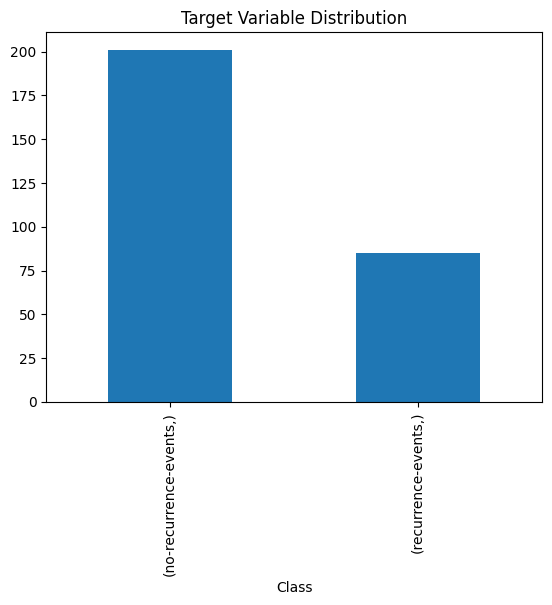

In [931]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.show()

In [932]:
# Check for missing values in 'node-caps'
print(X['node-caps'].isnull().sum())

# Check the unique values in 'node-caps'
print(X['node-caps'].unique())


8
['no' 'yes' nan]


In [933]:
# Use .loc to modify the 'breast-quad' column safely
X.loc[:, 'breast-quad'] = X['breast-quad'].fillna(X['breast-quad'].mode()[0])


Only 1 missing value = using the simplest approach

In [934]:
print(X.isnull().sum())

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64



### 3. **Merge Categories in Categorical Variables**
   - If you have categorical variables with many rare categories or unnecessary complexity, you may want to merge certain categories to simplify the model.
   - For instance, if a categorical variable has several infrequent categories that aren't important for the analysis, you can combine them into a single "Other" category.
   
   Example:
   ```python
   # Example: Merging rare categories in 'breast-quad' column
   X['breast-quad'] = X['breast-quad'].replace({'I': 'Other', 'II': 'Other'})
   ```

   - You can also group categories that have a similar meaning or impact in the model.
   
### 4. **Encoding Categorical Variables**
   - Categorical variables need to be encoded into a numerical format for machine learning models. You can do this using:
     - **One-hot encoding**: For categorical variables with no inherent order (e.g., "yes", "no").
     - **Label encoding**: For ordinal variables (e.g., categories with a clear order like "low", "medium", "high").

   Example:
   ```python
   # One-hot encode 'menopause' column
   X = pd.get_dummies(X, columns=['menopause'])

   # Label encode 'node-caps' column
   from sklearn.preprocessing import LabelEncoder
   le = LabelEncoder()
   X['node-caps'] = le.fit_transform(X['node-caps'])
   ```

### 7. **Outlier Detection and Removal**
   - Outliers can have a significant impact on certain machine learning algorithms. You can use statistical methods to detect and remove outliers if needed.
   - For instance, using the **IQR (Interquartile Range)** method or **Z-scores** to identify and handle outliers.

### 8. **Balancing the Dataset (if necessary)**
   - If you have an imbalanced dataset (e.g., many more instances of one class in the target variable), you might need to apply techniques like:
     - **Oversampling** the minority class (e.g., using SMOTE).
     - **Undersampling** the majority class.

---

### Summary

- **Imputation**: Handle missing data appropriately (mean, mode, KNN, etc.).
- **Transformations**: Log-transform skewed variables to improve distribution.
- **Merge Categories**: Simplify categories in categorical features where necessary.
- **Encoding**: Encode categorical variables so they can be used by machine learning algorithms.
- **Scaling**: Normalize or standardize features, especially when they have different scales.
- **Feature Engineering**: Create new features that may better represent the underlying data.
- **Outlier Removal**: Detect and handle outliers if they significantly affect the model.
- **Balance Data**: Address class imbalance if your dataset is skewed.

These steps will help make your dataset ready for building models. Let me know if you'd like further details on any of the steps!

In [935]:
for column in ['age', 'tumor-size', 'inv-nodes']:
    print(f"Unique values in {column}: {X[column].unique()}")

Unique values in age: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
Unique values in tumor-size: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '14-Oct' '40-44' '35-39'
 '9-May' '45-49']
Unique values in inv-nodes: ['0-2' '8-Jun' '11-Sep' '5-Mar' '15-17' '14-Dec' '24-26']


In [936]:
# Define mapping for tumor-size and inv-nodes corrections
tumor_size_corrections = {
    '14-Oct': '10-14',
    '9-May': '5-9',
}

inv_nodes_corrections = {
    '8-Jun': '6-8',
    '11-Sep': '9-11',
    '5-Mar': '3-5',
    '14-Dec': '12-14',
}

# Apply corrections to tumor-size using .loc
X.loc[:, 'tumor-size'] = X['tumor-size'].replace(tumor_size_corrections)

# Apply corrections to inv-nodes using .loc
X.loc[:, 'inv-nodes'] = X['inv-nodes'].replace(inv_nodes_corrections)



In [937]:
print("Unique values in tumor-size:", X['tumor-size'].unique())
print("Unique values in inv-nodes:", X['inv-nodes'].unique())

Unique values in tumor-size: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Unique values in inv-nodes: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']


In [938]:
print(X[['age', 'tumor-size', 'inv-nodes']].head())  # Check the first few rows of the columns


     age tumor-size inv-nodes
0  30-39      30-34       0-2
1  40-49      20-24       0-2
2  40-49      20-24       0-2
3  60-69      15-19       0-2
4  40-49        0-4       0-2


In [939]:
print(X[['age', 'tumor-size', 'inv-nodes']].dtypes)  # Remove the parentheses after dtypes

age           object
tumor-size    object
inv-nodes     object
dtype: object


In [940]:
import pandas as pd
import numpy as np

# Define the conversion function to handle ranges
def convert_range_to_midpoint(value):
    if isinstance(value, str):
        value = value.strip()  # Remove extra spaces
    if isinstance(value, str) and '-' in value:  # Check for range
        try:
            lower, upper = map(int, value.split('-'))  # Split into bounds
            return (lower + upper) / 2  # Calculate midpoint
        except ValueError:
            return np.nan  # If conversion fails, return NaN
    try:
        return float(value)  # If it's already a number
    except ValueError:
        return np.nan  # Non-convertible values to NaN

# Apply conversion to the columns and enforce float data type
X.loc[:, 'age'] = X['age'].apply(convert_range_to_midpoint)
X['age'] = X['age'].astype(float)  # Ensure data type is float

X.loc[:, 'tumor-size'] = X['tumor-size'].apply(convert_range_to_midpoint)
X['tumor-size'] = X['tumor-size'].astype(float)

X.loc[:, 'inv-nodes'] = X['inv-nodes'].apply(convert_range_to_midpoint)
X['inv-nodes'] = X['inv-nodes'].astype(float)


# Check results
print("Data types after forced conversion to float:")
print(X[['age', 'tumor-size', 'inv-nodes']].dtypes)
print("First few rows of the data:")
print(X[['age', 'tumor-size', 'inv-nodes']].head())


Data types after forced conversion to float:
age           float64
tumor-size    float64
inv-nodes     float64
dtype: object
First few rows of the data:
    age  tumor-size  inv-nodes
0  34.5        32.0        1.0
1  44.5        22.0        1.0
2  44.5        22.0        1.0
3  64.5        17.0        1.0
4  44.5         2.0        1.0


<ipython-input-940-4d2c617348dd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].astype(float)  # Ensure data type is float
<ipython-input-940-4d2c617348dd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tumor-size'] = X['tumor-size'].astype(float)
<ipython-input-940-4d2c617348dd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [941]:
# Check skewness of numeric columns
skewness = X[['age', 'tumor-size', 'inv-nodes']].skew()

print("Skewness of the numeric columns:")
print(skewness)

Skewness of the numeric columns:
age           0.015804
tumor-size    0.055714
inv-nodes     2.924955
dtype: float64


In [942]:
# Apply log transformation safely using .loc[]
#X.loc[:, 'inv-nodes'] = np.sqrt(X['inv-nodes']) #skew : 1.980980
#X.loc[:, 'inv-nodes'] = np.log(X['inv-nodes']) #skew :  1.469077
#X.loc[:, 'inv-nodes'] = np.sqrt(X['inv-nodes']) #skew = 1.980980
#from scipy import stats
X.loc[:, 'inv-nodes'], _ = stats.boxcox(X['inv-nodes']) #skew = 1.133
#X.loc[:, 'inv-nodes'] = X['inv-nodes'] ** 2  # Square the column #skew = 6.116313
#X.loc[:,'inv-nodes'] = X['inv-nodes'] ** (1/3)  # Cube root transformation skew = 1.767720
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X.loc[:,'inv-nodes'] = scaler.fit_transform(X[['inv-nodes']]) #skew: 2.924955



After trial and error, we pick the Box-cox transformation: provides the best reduction in skewness



In [943]:
# Check skewness again after log transformation
print("Skewness of the numeric columns after transformation:")
print(X[['age', 'tumor-size', 'inv-nodes']].skew())


Skewness of the numeric columns after transformation:
age           0.015804
tumor-size    0.055714
inv-nodes     1.133308
dtype: float64


# Step 4

Consider a specific business setting. Create an imaginary scenario where building a predictive model is necessary. Explain whose perspective you are adopting and how the predictions will be used.

The dataset, obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia, tracks breast cancer patients. The goal is to predict which patients are likely to experience cancer recurrence or remission post-treatment, guiding personalized care and monitoring plans.

As an Oncology Care Coordinator, I oversee patient follow-ups and allocate resources and treatment to high-risk patients.

**Why Build a Predictive Model?**:
Limited resources necessitate prioritizing high-risk patients. The model will estimate recurrence probability using features like age, menopause status, tumor size, involved lymph nodes, node caps, degree of malignancy, breast location, and irradiation history.

**How the Predictions Will Be Used**:
1. **High-Risk Patients**: Intensive monitoring, frequent check-ups, advanced imaging, and early interventions.
2. **Moderate-Risk Patients**: Balanced follow-up with routine tests and education.
3. **Low-Risk Patients**: Standard care protocols to reduce resource strain.
4. **Preventative Counseling**: Personalized advice on lifestyle changes and therapy adherence.
5. **Healthcare Planning**: Optimize staffing and resource allocation.

**Example Output**:
- **Recurrence Probability**: Likelihood of recurrence for each patient.
- **Feature Importance**: Key risk factors (e.g., tumor size, lymph nodes involved).

This model ensures timely interventions for high-risk patients and optimizes hospital resources, improving overall patient outcomes.

# Step 5

In this context, where the goal is to predict the recurrence of breast cancer in patients.
- A false positive happens when the model incorrectly predicts that a patient has a high risk of breast - cancer recurrence when the patient has low risk in reality.
- A false negative happens when the model incorrectly predicts that a patient does not have a high risk of breast - cancer recurrence when they do in reality.

False positive consequences: The patient will undergo unnecessary medical treatment and surveillance, possibly causing emotional distress, potential side effects from treatments and the overuse of medical resources.

False negative consequences: A patient with undetected high risk may not receive adequate monitoring or early intervention, allowing the cancer to progress. This can make treatment more difficult or even impossible, leading to worse outcomes for the patient.

In this context, a false negative is generally more costly than a false positive because undetected recurrences can lead to worse outcomes, including advanced cancer that is harder to treat and has a higher chance of mortality. The costs of treating advanced cancer, including emergency care or hospitalization, are far greater than the costs of additional follow-up for a false positive.


**summary : **
* False Positive: The model incorrectly predicts a recurrence, leading to unnecessary treatments and tests.
* False Negative: The model fails to detect a recurrence, potentially allowing the cancer to progress and result in worse outcomes or even death.
* Costlier: A false negative is costlier because it could lead to worse health outcomes, more aggressive treatments later on, and increased healthcare costs.


The **cost ratio** of a **false positive** error to a **false negative** error is approximately **0.50776**. This means that a false positive is about **half the cost** of a false negative.

*   False Positive (FP): The incremental lifetime economic burden is $58 900 per patient

*   False Negative (FN): The incremental lifetime economic burden is $116 000 per patient.



This ratio is determined by dividing the cost of a false positive by the cost of a false negative, which indicates that missed diagnoses (false negatives) result in **higher costs** due to the need for more intensive treatments and worse health outcomes, while false positives primarily lead to unnecessary treatments and follow-ups.

**Source**: Garrison Jr., L.P., Babigumira, J.B., Masaquel, A., Wang, B.C.M., Lalla, D., & Brammer, M. (2015). The Lifetime Economic Burden of Inaccurate HER2 Testing: Estimating the Costs of False-Positive and False-Negative HER2 Test Results in US Patients with Early-Stage Breast Cancer. *Value in Health, 18*(3), 301-307. DOI: [10.1016/j.jval.2015.01.012](https://doi.org/10.1016/j.jval.2015.01.012).

# Step 6

In [944]:
def calculate_cost(y_actual, y_pred):

    # Calculate false positives (FP): predicted 1, actual 0
    FP = sum(1 for actual, pred in zip(y_actual, y_pred) if actual == 0 and pred == 1)

    # Calculate false negatives (FN): predicted 0, actual 1
    FN = sum(1 for actual, pred in zip(y_actual, y_pred) if actual == 1 and pred == 0)

    # Cost values based on the previous scenario
    cost_FP = 58900  # Cost of false positive
    cost_FN = 116000  # Cost of false negative

    # Calculate total cost
    total_cost = (cost_FN * FN) + (cost_FP * FP)

    return total_cost

# Step 7

In [945]:
import numpy as np

# Generate 100 candidate thresholds between 0 and 1 (inclusive)
thresholds = np.linspace(0, 1, 100)

# Print the candidate thresholds
print(thresholds)


[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

# Step 8

In [ ]:
x = ...  # Replace with your actual feature matrix
y = ...  # Replace with your actual target variable

**REVOIR !!!**

In [950]:
matrix = np.zeros((100, 10))

# Print the matrix to verify
print(matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [951]:
# Example data length
y = np.random.rand(100)  # Assuming 100 data points (replace with actual y values)

# Step 1: Generate repeated sequences of numbers 1 through 10 until the sequence length matches the total number of data points
n = np.ceil(len(y) / 10)  # To ensure each fold gets at least one data point
fold_vec = np.concatenate([np.arange(1, 11)] * int(n))

# Step 2: Trim the sequence to match the exact number of data points
fold_vec = fold_vec[0:len(y)]

# Step 3: Shuffle the sequence randomly
np.random.seed(1)  # For reproducibility
fold_vec = np.random.permutation(fold_vec)

# Print the final fold vector
print(fold_vec)


[ 1  5  4  2  4  8  7  3 10  6  3 10  7  3  2  3  2  5  9  1  3  4  8  3
 10  6  5  8  7  9  8 10  5  6  9  1  9 10  4  5  7  4  8  6  4  2  6  2
  7  9  4  6  5  5  9 10  2  8  4  5  1  7  1  3  8 10  9  1  1  1  8  3
  2  4  8  7  4  9  6  5 10  9  2  9  1  1  6  7  2  7  2  7  5 10  6  6
 10  3  3  8]


# Step 10

In [957]:
# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for i in range(n_folds):
    # Determine the test and train indices (using KFold)
    train_index, test_index = next(kf.split(x))

    # Split data into training and testing sets
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and fit the logistic regression model
    mod = LogisticRegression(max_iter=1000)
    mod.fit(x_train, y_train)

    # Predict probabilities
    prob = mod.predict_proba(x_test)[:, 1]

    for j in range(100):
        # Make predictions using the current threshold
        pred = (prob >= thresholds[j]).astype(int)

        # Calculate and store the cost
        matrix[j, i] = calculate_cost(y_test, pred)

NameError: name 'n_folds' is not defined